In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import gridspec
import Utilities.raster_utils as rast
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

#Wrapper function used to construct the 3 band image
def generate_three_band_image(Band_1, Band_2, Band_3, enhance_option, gamma, base,percentile):
    #display("The normailized imagery is shown below, adjust the histogram stretch `percentile` parameter and `gamma` correction parameter to enhance the image")
    percentile = int(percentile)
    image = rast.get_multiband_array(base, bn=(Band_1,Band_2,Band_3), BB=(None,), enhance=enhance_option, gamma=gamma, percentile=percentile)
    plt.figure(figsize = (10,8))
    gs = gridspec.GridSpec(3, 2, width_ratios=[2, 1], hspace=.5)
    
    #show histogram of band values
    ax1 = plt.subplot(gs[0,-1])
    ax1.hist(image[:,:,0].flatten(),26,(0,256))
    ax1.yaxis.set_visible(False)
    ax1.set_title('Band 1')
    
    ax2 = plt.subplot(gs[1,-1])
    ax2.hist(image[:,:,1].flatten(),26,(0,256))
    ax2.yaxis.set_visible(False)
    ax2.set_title('Band 2')
    
    ax3 = plt.subplot(gs[-1,-1])
    ax3.hist(image[:,:,2].flatten(),26,(0,256))
    ax3.yaxis.set_visible(False)
    ax3.set_title('Band 3')

    #show Landsat image
    plt.subplot(gs[:,0])
    plt.imshow(image)
    
    plt.figure()
    plt.show()

# Visualizing Landsat Imagery

The first step in any project should be looking at the data. Unfortunately, when you are working with satellite imagery, it can take a fair amount of work to turn the raw imagery into something that *looks* like what we would expect.

Turning raw Landsat imagery into the familiar imagery we are used to seeing requires three steps:

* Select and normalize the three bands you want to display (Image normalization: https://en.wikipedia.org/wiki/Normalization_(image_processing))
* Stretch the data to make use of the whole color scale (Histogram stretching: http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm)
* Adjust the relative luminance intensity (Gamma correction: https://en.wikipedia.org/wiki/Gamma_correction)

Walk through these steps using the interactive tools below:

1. Run the IPython cells below by clicking the `play` button in the tool bar at the top of the screen
2. Select the bands you want to display using the dropdown menus
3. Using the histograms on the right, select the percentile of the data the histogram should be stretched to (i.e., setting the percentile to 95 excludes the top 5% of the values from the histogram, stretching the other 95% of the data across the 0 - 255 value range)
4. Adjust the gamma correction factor to increase the lightness or darkness of the image

The example imagery I am using is part of a Landsat 8 scene collected over mid-Michigan in June of 2015. There is a lot to see here: At the top is a small part of Lake Huron; the city of Saginaw is located near the middle of the image. For a standard RGB image, I found `percentile = 95` and `gamma = 1.25` to give good results.

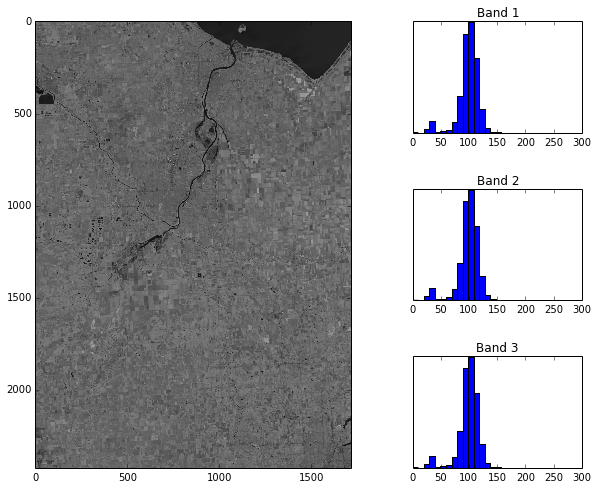

In [4]:
#Run this cell to activate the interactive tools below!

#To see a standard RGB image: set Band_1 = Red, Band_2 = Green, Band_3 = Blue

base_str = 'Imagery_Data/L8'
interact(generate_three_band_image,Band_1={'NIR':5 ,'Red':4, 'Green':3, 'Blue':2}, Band_2={'NIR':5 ,'Red':4, 'Green':3, 'Blue':2}, Band_3={'NIR':5 ,'Red':4, 'Green':3, 'Blue':2}, enhance_option=fixed('stretch_histogram'), gamma=(0.5,2.5,.25), percentile='100', base=fixed(base_str));